<a href="https://www.kaggle.com/code/tolgatanrisever/house-price-eda-modelling?scriptVersionId=109068819" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a><br>
# Introduction<br>

1. [Introduction](#1)<br>
2. [Load and Check Data](#2)<br>
3. [Variable Description](#3)<br>
&ensp; 3.1. [Univariate Variable Analysis](#4)<br>
&ensp;&ensp;  3.1.1 [Numerical Variable](#5)<br>
&ensp; &ensp; 3.1.2 [Categorical Variable](#6)<br>
4. [Basic Data Analysis](#7)<br>
5. [Outlier Detection](#8)<br>
6. [Missing Value](#9)<br>
7. [Visualization](#10)<br>
8. [Feature Engineering And Model's](#11)<br>
&ensp;8.1[Feature Engineering for train_df](#12)<br>
&ensp;8.2[Modeling for train_df](#13)<br>
&ensp;8.3[Feature Engineering for train_test](#14)<br>
&ensp;8.4[Modeling for train_test](#15)<br>






<a id="2"></a><br>
# 2 Load and Check Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


1. Load and Check Data

In [2]:
train_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
test_df=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test_Id = test_df["Id"]

In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [6]:
train_df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [7]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<a id="3"></a><br>
# 3. Variable Description<br>

## Variable Descriptions are in variable_description.txt


<a id="4"></a><br>
### 3.1. Univariate Variable Analysis<br>
3.1.1 Categorical Variable : <br>
3.1.2 Numerical Variable: 

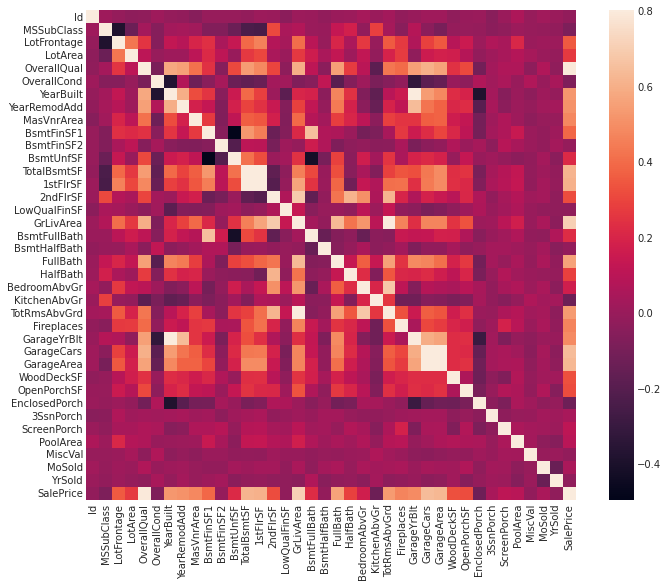

In [8]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [9]:
train_df['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [10]:
fig=px.histogram(train_df['SalePrice'],width=600, height=400);
fig.show()

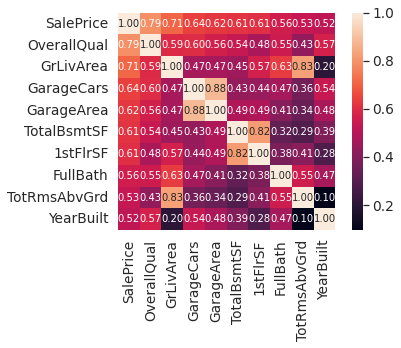

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plot_num_var=["SalePrice","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","1stFlrSf","FullBath","TotRmsAbvGrd","YearBuilt"]

In [12]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<a id="5"></a><br>
### Numerical Variable:

In [13]:
categoryNumerical=[ 'YearBuilt', 'YearRemodAdd','MasVnrArea','BsmtFinSF1',
                   'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',  '1stFlrSF', '2ndFlrSF','GrLivArea','GarageYrBlt',
                   'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','3SsnPorch', 'ScreenPorch', 
                   'PoolArea',  'MiscVal']
plot_num_var=["SalePrice","YearBuilt","GrLivArea","TotalBsmtSF","1stFlrSF"]


In [14]:
trainVisual=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [15]:
import plotly_express as px


def sct(variable):
    fig = px.scatter(trainVisual,x=variable,y="SalePrice",title=variable,width=700,
                 height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable)
    fig.show()

In [16]:
for i in plot_num_var:
    sct(i)

<a id="6"></a><br>
### Categorical Variable

In [17]:
categoryCategorical =['MSSubClass','MSZoning','Street','Alley','LotShape','LotFrontage', 'LotArea', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2','Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional','FireplaceQu', 'GarageType',
        'GarageFinish','GarageQual','GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 'SaleType','SaleCondition',
        'LowQualFinSF','BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
plot_cat_var=["OverallQual","GarageCars","FullBath","TotRmsAbvGrd"]

In [18]:
def box_bar_plots(variable):
    fig = px.histogram(train_df,x=variable,marginal='box',title=variable, width=700, height=500,color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.1)
    fig.show()
    fig1 = px.box(train_df, x=variable, y="SalePrice",color=variable,width=700,height=500,)
    fig1.update_traces(quartilemethod="exclusive")
    fig1.show()

In [19]:
# for i in categoryCategorical:
#     box_bar_plots(i)

<a id="7"></a><br>
# 4. Basic Data Analysis

## OverallQual
### from 10 to 1 from Very Excellent to Very poor
<font size=3>
&emsp;Let's not forget that we do the basic data analysis before the outlier detection.<br>
Therefore, we can see different values from the box plot. After the outlier detection, you can look at the box plots again.
</font>

In [20]:
# "OverallQual" vs "SalePrice
train_df[["OverallQual","SalePrice"]].groupby(["OverallQual"], as_index = False).mean().sort_values(by="SalePrice",ascending = False)

OverallQual      SalePrice
9           10  438588.388889
8            9  367513.023256
7            8  274735.535714
6            7  207716.423197
5            6  161603.034759
4            5  133523.347607
3            4  108420.655172
2            3   87473.750000
1            2   51770.333333
0            1   50150.000000

In [21]:
train_df.GrLivArea.describe()
train_df[train_df["GrLivArea"]>1599]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
6            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1447         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1450         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
6         8   2007        WD         Normal     307000  
...     ...    ...       ...            ...        ...  
1447     12   2007        WD         Normal     240000  
1450      9   2009        WD         Normal     136000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  

[570 rows x 81 columns]

In [22]:
#"GrLivArea" vs "SalePrice" and "OverallQual"
train_df[["GrLivArea","SalePrice","OverallQual"]].groupby(["OverallQual"], as_index = False).mean().sort_values(by="SalePrice",ascending = False)

OverallQual    GrLivArea      SalePrice
9           10  3001.388889  438588.388889
8            9  2077.511628  367513.023256
7            8  1947.613095  274735.535714
6            7  1703.833856  207716.423197
5            6  1465.874332  161603.034759
4            5  1250.748111  133523.347607
3            4  1106.672414  108420.655172
2            3  1119.150000   87473.750000
1            2   572.666667   51770.333333
0            1   619.000000   50150.000000

In [23]:
v=train_df
v=v.sort_values('OverallQual',ascending=True,ignore_index=True)
fig = px.scatter_3d(v, x='SalePrice', y='GrLivArea', z='OverallQual',animation_frame="OverallQual", animation_group="SalePrice",
              color='SalePrice')
fig.show()

In [24]:
#"GarageCars"vs "SalePrice"&"GrLivArea"&"OverallQual"
#GarageCars 4 ile 2 biribiri ile karışabilirgarage area ya bak garagecar(4)drop or replace() uygulabilir
train_df[["GarageCars","SalePrice","GrLivArea","OverallQual"]].groupby(["GarageCars"],as_index=False).mean().sort_values(by="GarageCars",ascending=False)

GarageCars      SalePrice    GrLivArea  OverallQual
4           4  192655.800000  1822.400000     5.400000
3           3  309636.121547  2084.607735     7.950276
2           2  183851.663835  1552.553398     6.251214
1           1  128116.688347  1221.157182     5.189702
0           0  103317.283951  1188.148148     4.604938

In [25]:
#buradaki büüyklük fatörünün etkisini gözlemlemek için daha fazlası gerekiyor
train_df[["TotalBsmtSF","SalePrice"]].groupby(["TotalBsmtSF"],as_index=False).mean().sort_values(by="TotalBsmtSF",ascending=False)

TotalBsmtSF      SalePrice
720         6110  160000.000000
719         3206  284000.000000
718         3200  430000.000000
717         3138  184750.000000
716         3094  555000.000000
..           ...            ...
4            270   52000.000000
3            264  102333.333333
2            190   91300.000000
1            105  116000.000000
0              0  105652.891892

[721 rows x 2 columns]

In [26]:
#TotalBsmtSF ile SalePrice arasındaki ilişkiyi evlerin toplam metrekareri le daha net anlayaniliçeğimizi düşünüyorum
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

In [27]:
train_df[["TotalSF","SalePrice"]].groupby(["TotalSF"],as_index=False).mean().sort_values(by="TotalSF",ascending=False)

TotalSF  SalePrice
962    11752   160000.0
961     7814   184750.0
960     6872   745000.0
959     6760   755000.0
958     6428   430000.0
..       ...        ...
4        845    84000.0
3        827   107500.0
2        728    60000.0
1        720    72500.0
0        334    39300.0

[963 rows x 2 columns]

In [28]:
#doğrusu burada bir ilişki var buraya daha sonra bakaçağız
train_df[["YearBuilt","SalePrice"]].groupby(by=["YearBuilt"],as_index=False).mean().sort_values("SalePrice",ascending=False)

YearBuilt      SalePrice
111       2010  394432.000000
109       2008  348849.130435
7         1893  325000.000000
6         1892  291250.000000
90        1989  279500.000000
..         ...            ...
28        1924  105985.714286
34        1930  103588.888889
1         1875   94000.000000
17        1913   90350.000000
31        1927   82666.666667

[112 rows x 2 columns]

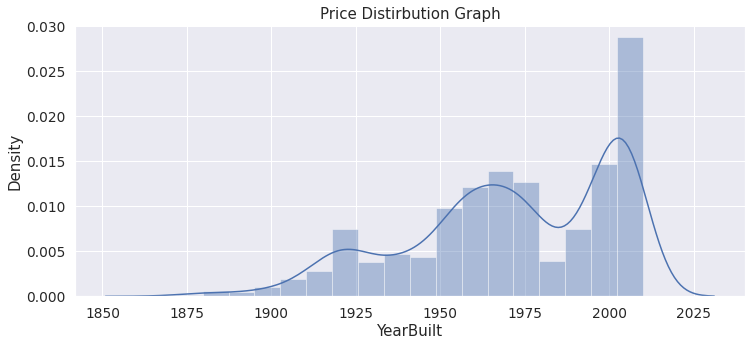

In [29]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(train_df["YearBuilt"])

In [30]:
variable="YearBuilt"
fig = px.scatter(train_df,x="YearBuilt",y="SalePrice",title=variable,width=700,height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable)
fig.show()

In [31]:
#veri setinin eğitiminebir katkı sağlayacanı düsünmüyorum
train_df[["Neighborhood","SalePrice"]].groupby(by="Neighborhood",as_index=False).mean().sort_values(by="SalePrice",ascending=False)

Neighborhood      SalePrice
15      NoRidge  335295.317073
16      NridgHt  316270.623377
22      StoneBr  310499.000000
23       Timber  242247.447368
24      Veenker  238772.727273
21      Somerst  225379.837209
4       ClearCr  212565.428571
6       Crawfor  210624.725490
5       CollgCr  197965.773333
0       Blmngtn  194870.882353
8       Gilbert  192854.506329
14       NWAmes  189050.068493
20      SawyerW  186555.796610
11      Mitchel  156270.122449
12        NAmes  145847.080000
13      NPkVill  142694.444444
18        SWISU  142591.360000
1       Blueste  137500.000000
19       Sawyer  136793.135135
17      OldTown  128225.300885
7       Edwards  128219.700000
3       BrkSide  124834.051724
2        BrDale  104493.750000
9        IDOTRR  100123.783784
10      MeadowV   98576.470588

In [32]:
#veri setinin eğitiminebir katkı sağlayacanı düsünmüyorum
train_df[["Condition1","SalePrice"]].groupby(by="Condition1",as_index=False).mean().sort_values(by="SalePrice",ascending=False)

Condition1      SalePrice
3       PosA  225875.000000
4       PosN  215184.210526
8       RRNn  212400.000000
7       RRNe  190750.000000
2       Norm  184495.492063
6       RRAn  184396.615385
1      Feedr  142475.481481
5       RRAe  138400.000000
0     Artery  135091.666667

In [33]:
train_df["Condition2"].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [34]:
#burada çok güzel bir box plot olamsın rağmen verinin azlığından dolayı yanlış karar vermesine sebeb olabilir bü yüzden Norm =1 others=0 and duplicate 
train_df[["Condition2","SalePrice"]].groupby(by="Condition2",as_index=False).mean().sort_values(by="SalePrice",ascending=False)

Condition2      SalePrice
3       PosA  325000.000000
4       PosN  284875.000000
5       RRAe  190000.000000
2       Norm  181169.405536
6       RRAn  136905.000000
1      Feedr  121166.666667
0     Artery  106500.000000
7       RRNn   96750.000000

In [35]:
fig1 = px.box(train_df, x="Condition1", y="SalePrice",color="Condition1",width=700,height=500)
fig1.update_traces(quartilemethod="exclusive")
fig1.show()


In [36]:
train_df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [37]:
#kullanmıcaz
train_df[["MSSubClass","SalePrice"]].groupby(by="MSSubClass",as_index=False).mean().sort_values(by="SalePrice",ascending=False)

MSSubClass      SalePrice
5           60  239948.501672
11         120  200779.080460
7           75  192437.500000
0           20  185224.811567
8           80  169736.551724
6           70  166772.416667
2           40  156125.000000
9           85  147810.000000
4           50  143302.972222
12         160  138647.380952
10          90  133541.076923
14         190  129613.333333
3           45  108591.666667
13         180  102300.000000
1           30   95829.724638

In [38]:
#FV RH drop dublicate
train_df[["MSZoning","SalePrice"]].groupby(by=["MSZoning"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

MSZoning      SalePrice
1       FV  214014.061538
3       RL  191004.994787
2       RH  131558.375000
4       RM  126316.830275
0  C (all)   74528.000000

In [39]:
train_df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [40]:
#anlamlı bir veri ama coğu evde değeri bilinmiyor bu yüzden değil drop edilicek 
print(train_df.Alley.value_counts())
train_df[["Alley","SalePrice"]].groupby(by=["Alley"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

Grvl    50
Pave    41
Name: Alley, dtype: int64


Alley      SalePrice
1  Pave  168000.585366
0  Grvl  122219.080000

In [41]:
#drop edilicek bir veri box plotta da görmüştük
print(train_df.HouseStyle.value_counts())
train_df[["HouseStyle","SalePrice"]].groupby(by=["HouseStyle"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


HouseStyle      SalePrice
3     2.5Fin  220000.000000
5     2Story  210051.764045
2     1Story  175985.477961
7       SLvl  166703.384615
4     2.5Unf  157354.545455
0     1.5Fin  143116.740260
6     SFoyer  135074.486486
1     1.5Unf  110150.000000

In [42]:
#  CompShg    1434== 1
#  Tar&Grv-WdShngl-WdShake-Metal-MembranRoll-ClyTile  ==0 şeklinde replace sonra duplicate  
print(train_df.RoofMatl.value_counts())
train_df[["RoofMatl","SalePrice"]].groupby(by=["RoofMatl"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64


RoofMatl      SalePrice
7  WdShngl  390250.000000
2  Membran  241500.000000
6  WdShake  241400.000000
5  Tar&Grv  185406.363636
3    Metal  180000.000000
1  CompShg  179803.679219
0  ClyTile  160000.000000
4     Roll  137000.000000

In [43]:
#ExterQual---BsmtQual----BsmtCond bunları birlikte incele 
#veri kümesinde bir dağılım eştşizliği var ama fark bariz bir şekilde ortada dublicate
print(train_df.ExterQual.value_counts())
train_df[["ExterQual","SalePrice"]].groupby(by=["ExterQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64


ExterQual      SalePrice
0        Ex  367360.961538
2        Gd  231633.510246
3        TA  144341.313466
1        Fa   87985.214286

In [44]:
##veri kümesinde bir dağılım eştşizliği var ama fark bariz bir şekilde ortada dublicate
print(train_df.BsmtQual.value_counts())
train_df[["BsmtQual","SalePrice"]].groupby(by=["BsmtQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


BsmtQual      SalePrice
0       Ex  327041.041322
2       Gd  202688.478964
3       TA  140759.818182
1       Fa  115692.028571

In [45]:
#kullanılamaz
print(train_df.BsmtCond.value_counts())
train_df[["BsmtCond","SalePrice"]].groupby(by=["BsmtCond"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


BsmtCond      SalePrice
1       Gd  213599.907692
3       TA  183632.620900
0       Fa  121809.533333
2       Po   64000.000000

In [46]:
#veri kümesinini fiyat değerleri iç içe geçmiş kullanılamaz
print(train_df.BsmtExposure.value_counts())
train_df[["BsmtExposure","SalePrice"]].groupby(by=["BsmtExposure"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64


BsmtExposure      SalePrice
1           Gd  257689.805970
0           Av  206643.420814
2           Mn  192789.657895
3           No  165652.295908

In [47]:
#veri kümesinin gasA zaten verinin çoğunda olan bir durum anlamsız bir veri drop
print(train_df.Heating.value_counts())
train_df[["Heating","SalePrice"]].groupby(by=["Heating"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


Heating      SalePrice
1    GasA  182021.195378
2    GasW  166632.166667
4    OthW  125750.000000
5    Wall   92100.000000
3    Grav   75271.428571
0   Floor   72500.000000

In [48]:
#veride eşit bir dağılım yok ama kullanılabilir bariz bir fark var 
print(train_df.CentralAir.value_counts())
train_df[["CentralAir","SalePrice"]].groupby(by=["CentralAir"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

Y    1365
N      95
Name: CentralAir, dtype: int64


CentralAir      SalePrice
1          Y  186186.709890
0          N  105264.073684

In [49]:
#outlier den sonra incele dublicate edilip kullanılabilir bir veri
print(train_df.KitchenQual.value_counts())
train_df[["KitchenQual","SalePrice"]].groupby(by=["KitchenQual"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


KitchenQual      SalePrice
0          Ex  328554.670000
2          Gd  212116.023891
3          TA  139962.511565
1          Fa  105565.205128

In [50]:
#kullanılamaz
print(train_df.SaleCondition.value_counts())
train_df[["SaleCondition","SalePrice"]].groupby(by=["SaleCondition"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


SaleCondition      SalePrice
5       Partial  272291.752000
4        Normal  175202.219533
2        Alloca  167377.416667
3        Family  149600.000000
0       Abnorml  146526.623762
1       AdjLand  104125.000000

In [51]:
b_a=["MSSubClass","Alley","LotShape","Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd"
     ,"MasVnrType","Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","BedroomAbvGr","Fireplaces"]
for i in b_a:
    print("---------",i,"--------------")
    print(train_df[i].value_counts())
    print(train_df[[i,"SalePrice"]].groupby(i,as_index=False).mean().sort_values(by="SalePrice",ascending=False))

--------- MSSubClass --------------
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
    MSSubClass      SalePrice
5           60  239948.501672
11         120  200779.080460
7           75  192437.500000
0           20  185224.811567
8           80  169736.551724
6           70  166772.416667
2           40  156125.000000
9           85  147810.000000
4           50  143302.972222
12         160  138647.380952
10          90  133541.076923
14         190  129613.333333
3           45  108591.666667
13         180  102300.000000
1           30   95829.724638
--------- Alley --------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
  Alley      SalePrice
1  Pave  168000.585366
0  Grvl  122219.080000
--------- LotShape --------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
  LotShape      SalePrice
1      

In [52]:
# b_a=["MSSubClass","Alley","LotShape","Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd"
#      ,"MasVnrType","Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","BedroomAbvGr","Fireplaces"]
# for i in b_a:
#     prob_his(i)

In [53]:
# t=train_df

In [54]:
# def change(var):
#     t[var] = [0 if i == "Ex" else 1 if i == "Gd" else 2 if i =="TA" else 3 if i=="Fa" else 4 if i=="Po" else 5 for i in t[var]]

In [55]:
# qual=["ExterQual", "ExterCond",  "BsmtQual", "BsmtCond","KitchenQual", "GarageQual", "GarageCond"]
# for i in qual:
#     change(i)

In [56]:
# t["quality"]=t["ExterQual"]+t["ExterCond"]+t["BsmtQual"]+t["BsmtCond"]+t["KitchenQual"]+t["GarageQual"]+t["GarageCond"]

In [57]:
# print(t.quality.value_counts())
# t[["quality","SalePrice"]].groupby(by=["quality"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

In [58]:
# t.reset_index()

In [59]:
# t.drop(t[t["quality"]>20].index,axis =0,inplace=True)

In [60]:
# fig = px.histogram(t,x = "quality", y = "SalePrice",color="quality",histfunc='avg',marginal='box',barmode='overlay',title=variable, width=700, height=500)
# fig.update_layout(bargap=0.1,barmode='stack')
# fig.show()

In [61]:
# modeling_valuesa=["SalePrice","quality","OverallQual", "GrLivArea", "GarageCars", "TotalSF", "YearBuilt",  "MSZoning",   "ExterQual", "BsmtQual", "CentralAir", "KitchenQual"]
# sns.heatmap(t[modeling_valuesa].corr(), annot = True,annot_kws={'size': 10}, fmt = ".2f")
# plt.show()

In [62]:
# variable="quality"
# fig = px.histogram(t,x=variable,marginal='box',title=variable, width=700, height=500,color_discrete_sequence=['indianred'])
# fig.update_layout(bargap=0.1)
# fig.show()
# fig1 = px.box(t, x=variable, y="SalePrice",color=variable,width=700,height=500,)
# fig1.update_traces(quartilemethod="exclusive")
# fig1.show()
# fig = px.scatter(t,x=variable,y="SalePrice",title=variable,width=700,height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable)
# fig.show()

burada temil veri analizi bitiriyoruz veri setindeki uyum veriyi incelemeyi basit bir hale getirdiği doğru bir durum daah tedaylı bir incelemeye gerek duymuyorum Outlier Detection ile devam ediyoruz

<a id="8"></a><br>
# Outlier Detection

In [63]:
modeling_values=["OverallQual", "GrLivArea", "GarageCars", "TotalSF", "YearBuilt",  "MSZoning",   "ExterQual", "BsmtQual", "CentralAir", "KitchenQual"
                ,"MSSubClass","Alley","LotShape","Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd","MasVnrType",
                 "Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","BedroomAbvGr","Fireplaces"]

In [64]:
def detect_outliers(df, features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c], 25)
        #3rd quartile
        Q3=np.percentile(df[c], 75)
        #IQR
        IQR=Q3-Q1
        #Outlier step
        outlier_step=IQR * 1.5
        #detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers
        

In [65]:
train_df.loc[detect_outliers(train_df,[ 'SalePrice','GrLivArea',"TotalSF","MSSubClass",
"BedroomAbvGr"])]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
496    497          20       RL          NaN    12692   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
769    770          60       RL         47.0    53504   Pave   NaN      IR2   
798    799          60       RL        104.0    13518   Pave   NaN      Reg   
803    804          60       RL        107.0    13891   Pave   NaN      Reg   
1046  1047          60       RL         85.0    16056   Pave   NaN      IR1   
1169  1170          60       RL        118.0    35760   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1353  1354          50       RL         56.0    14720   Pave   NaN      IR1   
118    119          60       RL         90.0    12376   Pave   NaN      Reg   
635    636         190       RH         60.0    10896   Pave  Pave      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
496          Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
691          Lvl    AllPub  ...    NaN    NaN         NaN       0      1   
769          HLS    AllPub  ...    NaN    NaN         NaN       0      6   
798          Lvl    AllPub  ...    NaN    NaN         NaN       0      7   
803          Lvl    AllPub  ...    NaN    NaN         NaN       0      1   
1046         Lvl    AllPub  ...    NaN    NaN         NaN       0      7   
1169         Lvl    AllPub  ...    NaN    NaN         NaN       0      7   
1182         Lvl    AllPub  ...     Ex  MnPrv         NaN       0      7   
1353         Lvl    AllPub  ...    NaN    NaN         NaN       0      3   
118          Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
635          Bnk    AllPub  ...    NaN    NaN         NaN       0      3   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
496    2007       WD         Normal     430000     6428  
691    2007       WD         Normal     755000     6760  
769    2010       WD         Normal     538000     4929  
798    2009      New        Partial     485000     5066  
803    2009      New        Partial     582933     4556  
1046   2006      New        Partial     556581     4860  
1169   2006       WD         Normal     625000     5557  
1182   2007       WD        Abnorml     745000     6872  
1353   2010       WD         Normal     410000     5271  
118    2010       WD         Normal     320000     4895  
635    2007       WD        Abnorml     200000     4320  

[11 rows x 82 columns]

In [66]:
train_df = train_df.drop(detect_outliers(train_df,[ 'SalePrice','GrLivArea',"TotalSF","MSSubClass",
"BedroomAbvGr"]),axis = 0).reset_index(drop = True)

<a id="9"></a><br>
# Missing Value

In [67]:
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [68]:
print("train =",train_df_len)
len(train_df)

train = 1449


2908

In [69]:
for i in modeling_values:
    if train_df[i].isnull().any()==True:
        print(i,train_df[i].isnull().any()) 
    

GarageCars True
TotalSF True
MSZoning True
BsmtQual True
KitchenQual True
Alley True
Exterior1st True
Exterior2nd True
MasVnrType True
BsmtExposure True
BsmtFinType1 True
SaleType True


### garagecars

In [70]:
cars=train_df[(train_df["TotalSF"]>2650.0)&(train_df["TotalSF"]<2700.0)]
cars.reset_index()
cars[["TotalSF","GarageCars"]].groupby(by=["GarageCars"],as_index=False).mean().sort_values(by="TotalSF",ascending=False)


GarageCars      TotalSF
0         0.0  2688.000000
3         3.0  2682.400000
4         4.0  2677.333333
2         2.0  2675.921569
1         1.0  2670.307692

In [71]:
train_df[train_df["GarageCars"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2565  2577          70       RM         50.0     9060   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
2565         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      3   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
2565   2007       WD         Alloca        NaN   2687.0  

[1 rows x 82 columns]

In [72]:
train_df["GarageCars"][2565]=0.0


### TotalSF 

In [73]:
train_df[train_df["TotalSF"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2109  2121          20       RM         99.0     5940   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
2109         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      4   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
2109   2008    ConLD        Abnorml        NaN      NaN  

[1 rows x 82 columns]

In [74]:
train_df["GarageCars"][2019]

2.0

In [75]:
train_df["TotalSF"][2109]=2675.921569

### MSZoning

In [76]:
train_df[train_df["MSZoning"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1904  1916          30      NaN        109.0    21780   Grvl   NaN      Reg   
2205  2217          20      NaN         80.0    14584   Pave   NaN      Reg   
2239  2251          70      NaN          NaN    56600   Pave   NaN      IR1   
2893  2905          20      NaN        125.0    31250   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1904         Lvl       NaN  ...    NaN   NaN         NaN       0      3   
2205         Low    AllPub  ...    NaN   NaN         NaN       0      2   
2239         Low    AllPub  ...    NaN   NaN         NaN       0      1   
2893         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
1904   2009    ConLD         Normal        NaN    810.0  
2205   2008       WD        Abnorml        NaN    733.0  
2239   2008       WD         Normal        NaN   2522.0  
2893   2006       WD         Normal        NaN   1600.0  

[4 rows x 82 columns]

In [77]:
train_df["MSZoning"][2205]="RL"
train_df["MSZoning"][1904]="RM"
train_df["MSZoning"][2239]="RL"
train_df["MSZoning"][2893]="RL"

In [78]:
train_df[train_df["MSZoning"].isnull()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, TotalSF]
Index: []

[0 rows x 82 columns]

In [79]:
train_df["MSZoning"][(train_df["MSSubClass"]==70)].value_counts()

RM         63
RL         58
C (all)     4
RH          3
Name: MSZoning, dtype: int64

In [80]:
train_df["MSZoning"][(train_df["TotalSF"]>2500.0)&(train_df["TotalSF"]<2550.0)].value_counts()

RL    60
FV     4
RM     4
RH     1
Name: MSZoning, dtype: int64

### BsmtQual

In [81]:
#It is difficult for us to drop 81 pieces of data, most of them are in test_df.
train_df[train_df["BsmtQual"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
90      91          20       RL         60.0     7200   Pave   NaN      Reg   
102    103          90       RL         64.0     7018   Pave   NaN      Reg   
155    157          20       RL         60.0     7200   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2792  2804          20       RL        100.0    21370   Pave   NaN      Reg   
2793  2805          30       RL         55.0     8250   Pave   NaN      Reg   
2813  2825          20       RL         80.0    12048   Pave   NaN      Reg   
2880  2892          30  C (all)         69.0    12366   Pave   NaN      Reg   
2893  2905          20       RL        125.0    31250   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
17           Lvl    AllPub  ...    NaN   NaN        Shed     500     10   
39           Lvl    AllPub  ...    NaN   NaN         NaN       0      6   
90           Lvl    AllPub  ...    NaN   NaN         NaN       0      7   
102          Bnk    AllPub  ...    NaN   NaN         NaN       0      6   
155          Lvl    AllPub  ...    NaN   NaN         NaN       0      6   
...          ...       ...  ...    ...   ...         ...     ...    ...   
2792         Lvl    AllPub  ...    NaN   NaN        Shed     600      6   
2793         Lvl    AllPub  ...    NaN   NaN         NaN       0      6   
2813         Lvl    AllPub  ...    NaN   NaN         NaN       0      4   
2880         Lvl    AllPub  ...    NaN   NaN         NaN       0     10   
2893         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
17     2006       WD         Normal    90000.0   1296.0  
39     2008       WD        AdjLand    82000.0   1152.0  
90     2006       WD         Normal   109900.0   1040.0  
102    2009       WD         Alloca   118964.0   1535.0  
155    2006       WD         Normal   109500.0   1040.0  
...     ...      ...            ...        ...      ...  
2792   2006       WD         Normal        NaN   1640.0  
2793   2006       WD         Normal        NaN   1032.0  
2813   2006       WD         Normal        NaN   1488.0  
2880   2006       WD        Abnorml        NaN    729.0  
2893   2006       WD         Normal        NaN   1600.0  

[81 rows x 82 columns]

### KitchenQual 

In [82]:
train_df[train_df["KitchenQual"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1544  1556          50       RL         72.0    10632   Pave   NaN      IR1   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
1544         Lvl    AllPub  ...    NaN   NaN         NaN       0      1   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
1544   2010      COD         Normal        NaN   1913.0  

[1 rows x 82 columns]

In [83]:
kitchen=train_df[(train_df["TotalSF"]>1890.0) & (train_df["TotalSF"]<1920.0)].sort_values(by="TotalSF",ascending=False)

In [84]:
kitchen[["KitchenQual","TotalSF"]].groupby(("KitchenQual"),as_index=False).mean().sort_values("TotalSF", ascending=False)

KitchenQual     TotalSF
0          Ex  1912.00000
2          Gd  1908.25000
3          TA  1904.52381
1          Fa  1904.00000

In [85]:
train_df["KitchenQual"][1544]="Ex"

### Alley

In [86]:
train_df[train_df["Alley"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2903  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2904  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2905  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2906  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2907  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1            Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
2            Lvl    AllPub  ...    NaN    NaN         NaN       0      9   
3            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
4            Lvl    AllPub  ...    NaN    NaN         NaN       0     12   
...          ...       ...  ...    ...    ...         ...     ...    ...   
2903         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   
2904         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
2905         Lvl    AllPub  ...    NaN    NaN         NaN       0      9   
2906         Lvl    AllPub  ...    NaN  MnPrv        Shed     700      7   
2907         Lvl    AllPub  ...    NaN    NaN         NaN       0     11   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
0      2008       WD         Normal   208500.0   2566.0  
1      2007       WD         Normal   181500.0   2524.0  
2      2008       WD         Normal   223500.0   2706.0  
3      2006       WD        Abnorml   140000.0   2473.0  
4      2008       WD         Normal   250000.0   3343.0  
...     ...      ...            ...        ...      ...  
2903   2006       WD         Normal        NaN   1638.0  
2904   2006       WD        Abnorml        NaN   1638.0  
2905   2006       WD        Abnorml        NaN   2448.0  
2906   2006       WD         Normal        NaN   1882.0  
2907   2006       WD         Normal        NaN   2996.0  

[2711 rows x 82 columns]

### Exterior1st

In [87]:
train_df["Exterior1st"]

0       VinylSd
1       MetalSd
2       VinylSd
3       Wd Sdng
4       VinylSd
         ...   
2903    CemntBd
2904    CemntBd
2905    VinylSd
2906    HdBoard
2907    HdBoard
Name: Exterior1st, Length: 2908, dtype: object

In [88]:
train_df[train_df["Exterior1st"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2140  2152          30       RL         85.0    19550   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
2140         Lvl    AllPub  ...    NaN   NaN         NaN       0      1   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
2140   2008       WD         Normal        NaN   3098.0  

[1 rows x 82 columns]

In [89]:
train_df["Exterior1st"][2140]

nan

In [90]:
train_df["Exterior1st"][(train_df["GarageCars"]==0.0)].value_counts()

Wd Sdng    39
VinylSd    31
MetalSd    26
CemntBd    14
HdBoard    11
AsbShng     9
Plywood     8
WdShing     8
Stucco      5
BrkFace     3
AsphShn     2
Name: Exterior1st, dtype: int64

In [91]:
train_df[["Exterior1st","TotalSF"]].groupby("Exterior1st",as_index=False).mean().sort_values("TotalSF",ascending=False)

Exterior1st      TotalSF
10       Stone  3673.500000
7      ImStucc  3248.000000
5      CemntBd  2931.975806
12     VinylSd  2774.482860
3      BrkFace  2729.348837
9      Plywood  2592.904545
11      Stucco  2483.395349
2      BrkComm  2427.166667
6      HdBoard  2350.134091
13     Wd Sdng  2315.148780
8      MetalSd  2308.922048
14     WdShing  2229.625000
0      AsbShng  1985.204545
4       CBlock  1907.000000
1      AsphShn  1772.000000

In [92]:
train_df["Exterior1st"][2140]="CemntBd"

### Exterior2nd

In [93]:
train_df["GarageCars"][2140]

0.0

In [94]:
train_df[train_df["Exterior2nd"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2140  2152          30       RL         85.0    19550   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
2140         Lvl    AllPub  ...    NaN   NaN         NaN       0      1   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
2140   2008       WD         Normal        NaN   3098.0  

[1 rows x 82 columns]

In [95]:
print(train_df[["Exterior2nd","TotalSF"]].groupby("Exterior2nd",as_index=False).mean().sort_values("TotalSF",ascending=False))
print(train_df["Exterior2nd"][(train_df["GarageCars"]==0.0)].value_counts())
print(train_df["Exterior2nd"][(train_df["MSSubClass"]==30)].value_counts())

   Exterior2nd      TotalSF
9        Other  3640.000000
7      ImStucc  3004.428571
5      CmentBd  2941.160000
3      BrkFace  2781.847826
13     VinylSd  2770.574257
10     Plywood  2526.364312
4       CBlock  2513.307190
12      Stucco  2508.680851
6      HdBoard  2366.089109
14     Wd Sdng  2324.698210
8      MetalSd  2323.105145
11       Stone  2227.166667
2      Brk Cmn  2225.227273
15     Wd Shng  2217.012500
0      AsbShng  2110.631579
1      AsphShn  1867.500000
VinylSd    31
Wd Sdng    30
MetalSd    24
Plywood    16
CmentBd    14
HdBoard    12
Wd Shng    12
Stucco      6
AsbShng     6
BrkFace     2
AsphShn     2
CBlock      1
Name: Exterior2nd, dtype: int64
Wd Sdng    47
MetalSd    37
VinylSd    18
Stucco     15
Wd Shng     9
AsbShng     6
Plywood     3
BrkFace     2
HdBoard     1
Name: Exterior2nd, dtype: int64


In [96]:
train_df["Exterior2nd"][2140]="Other"

### They cannot be filled because they contain too much nan data  <br>
MasVnrType True<br>
BsmtExposure True<br>
BsmtFinType1 True<br>

### SaleType


In [97]:
train_df[train_df["SaleType"].isnull()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2478  2490          20       RL         85.0    13770   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold  \
2478         Lvl    AllPub  ...    NaN   NaN         NaN       0     10   

     YrSold SaleType  SaleCondition  SalePrice  TotalSF  
2478   2007      NaN         Normal        NaN   2334.0  

[1 rows x 82 columns]

In [98]:
train_df["MSSubClass"][2478]
train_df["GarageCars"][2478]

1.0

In [99]:
print(train_df[["SaleType","TotalSF"]].groupby("SaleType",as_index=False).mean().sort_values("TotalSF",ascending=False))
print(train_df["SaleType"][(train_df["GarageCars"]==1.0)].value_counts())
print(train_df["SaleType"][(train_df["MSSubClass"]==20)].value_counts())

  SaleType      TotalSF
6      New  3213.521186
4    ConLI  2635.000000
1      CWD  2593.666667
2      Con  2564.000000
8       WD  2485.623758
0      COD  2386.540230
7      Oth  2164.428571
3    ConLD  2142.612368
5    ConLw  1897.625000
WD       717
COD       35
ConLD      8
CWD        5
ConLw      4
Oth        3
ConLI      3
Name: SaleType, dtype: int64
WD       896
New      115
COD       49
ConLD      5
Oth        4
CWD        4
ConLI      2
Con        2
Name: SaleType, dtype: int64


In [100]:
train_df["SaleType"][2478]="WD"

<a id="10"></a><br>
# Visualization

# Visualization For Modelling Value

In [101]:
modeling_values=["OverallQual", "GrLivArea", "GarageCars", "TotalSF", "YearBuilt",  "MSZoning",   "ExterQual", "BsmtQual", "CentralAir", "KitchenQual"
                ,"MSSubClass","LotShape","Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd","MasVnrType",
                 "Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","BedroomAbvGr","Fireplaces"]
modeling_values_scater=["SalePrice", "GrLivArea", "TotalSF", "YearBuilt","BedroomAbvGr"]
modeling_values_histogram=["OverallQual",  "GarageCars","MSZoning",   "ExterQual", "BsmtQual", 
                           "CentralAir", "KitchenQual","MSSubClass","LotShape","Neighborhood","Condition1",
                           "BldgType","HouseStyle","Exterior1st","Exterior2nd","MasVnrType",
                           "Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","Fireplaces"]

In [102]:
# bhs("KitchenQual")

In [103]:
#visualize fonk
def bhs(variable):
    fig = px.histogram(train_df,x=variable,marginal='box',title=variable, width=700, height=500,color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.1)
    fig.show()
    fig = px.histogram(train_df,x = variable, y = "SalePrice",color=variable,histfunc='avg',marginal='box',barmode='overlay',title=variable, width=700, height=500)
    fig.update_layout(bargap=0.1,barmode='stack')
    fig.show()
    fig1 = px.box(train_df, x=variable, y="SalePrice",color=variable,width=700,height=500,)
    fig1.update_traces(quartilemethod="exclusive")
    fig1.show()
    fig = px.scatter(train_df,x=variable,y="SalePrice",title=variable,width=700,height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable)
    fig.show()

In [104]:
def prob_his(variable):
    fig = px.histogram(train_df,x=variable,marginal='box',title=variable, width=700, height=500,color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.1)
    fig.show()
    fig = px.histogram(train_df,x = variable, y = "SalePrice",color=variable,histfunc='avg',marginal='box',barmode='overlay',title=variable, width=700, height=500)
    fig.update_layout(bargap=0.1,barmode='stack')
    fig.show()
    fig1 = px.box(train_df, x=variable, y="SalePrice",color=variable,width=700,height=500,)
    fig1.update_traces(quartilemethod="exclusive")
    fig1.show()
def scatter_p(variable):
    fig = px.scatter(train_df,x=variable,y="SalePrice",title=variable,width=700,height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable)
    fig.show()

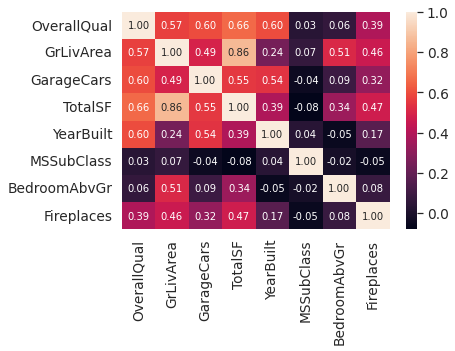

In [105]:
sns.heatmap(train_df[modeling_values].corr(), annot = True,annot_kws={'size': 10}, fmt = ".2f")
plt.show()

### "SalePrice"--"OverallQual"<br>
The higher the OverallQual, the higher the price.<br>
### "GarageCars"--"SalePrice"<br>
The higher the GaragesCars, the higher the price. but garage cars==4 also need a review<br>
### "MSZoning"--"SalePrice"<br>
FV and RH also need a review<br>
### "ExterQual"--"SalePrice"<br>
The higher the ExterQual, the smaller the price.<br>
### "BsmtQual"--"SalePrice"<br>
The higher the BsmtQual, the smaller the price. but BsmtQual==4 and 5 also need a review<br>
### "CentralAir"--"SalePrice"<br>
y or n
### "Kitchen"--"SalePrice"<br>
The higher the BsmtQual, the smaller the price<br>
### "GrLivArea", "TotalSF", "YearBuilt"<br>
The higher the  "GrLivArea", "TotalSF", "YearBuilt", the higher the price<br>

In [106]:
for i in modeling_values_histogram:
    prob_his(i)

In [107]:
# for i in modeling_values_scater:
#     scatter_p(i)

<a id="11"></a><br>
# Feature Engineering And Model's

<a id="12"></a><br>
### Feature Engineering for train_df

In [108]:
train_test_0=train_df
testval=train_df

In [109]:
cols=train_df.columns

In [110]:
train_df.drop(labels="YearBuilt",axis=1,inplace=True)
train_df.drop(labels="YearRemodAdd",axis=1,inplace=True)

In [111]:
for i in train_df.columns:
    train_df[i] = train_df[i].fillna("None")


In [112]:
for i in train_df.columns:  
    train_df[i].replace('None', 0, inplace=True)

In [113]:
train_df.columns.isnull().any()

False

In [114]:
num_cols = train_df._get_numeric_data().columns


In [115]:
cols=train_df.columns
cat_col=list(set(cols) - set(num_cols))


In [116]:
def detect_outliers(df, features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c], 25)
        #3rd quartile
        Q3=np.percentile(df[c], 75)
        #IQR
        IQR=Q3-Q1
        #Outlier step
        outlier_step=IQR * 1.5
        #detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        #store indeces
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [117]:
train_df.loc[detect_outliers(train_df[:train_df_len],num_cols)]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
48    49         190       RM         33.0     4456   Pave     0      Reg   
93    94         190  C (all)         60.0     7200   Pave     0      Reg   
124  126         190       RM         60.0     6780   Pave     0      Reg   
164  166         190       RL         62.0    10106   Pave     0      Reg   
171  173         160       RL         44.0     5306   Pave     0      IR1   
..   ...         ...      ...          ...      ...    ...   ...      ...   
639  643          80       RL         75.0    13860   Pave     0      Reg   
494  496          30  C (all)         60.0     7879   Pave     0      Reg   
779  785          75       RM         35.0     6300   Pave  Grvl      Reg   
112  113          60       RL         77.0     9965   Pave     0      Reg   
905  913          30       RM         51.0     6120   Pave     0      Reg   

    LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
48          Lvl    AllPub  ...      0      0           0       0      6   
93          Lvl    AllPub  ...      0      0           0       0     11   
124         Lvl    AllPub  ...      0      0           0       0      6   
164         Lvl    AllPub  ...      0      0           0       0      9   
171         Lvl    AllPub  ...      0      0           0       0      6   
..          ...       ...  ...    ...    ...         ...     ...    ...   
639         Lvl    AllPub  ...      0  MnPrv           0       0      7   
494         Lvl    AllPub  ...      0   GdWo           0       0     11   
779         Lvl    AllPub  ...      0      0           0       0      6   
112         Lvl    AllPub  ...      0      0           0       0     10   
905         Lvl    AllPub  ...      0  MnPrv        Shed     620      7   

    YrSold SaleType  SaleCondition  SalePrice TotalSF  
48    2009      New        Partial   113000.0  2188.0  
93    2007       WD         Normal   133900.0  3505.0  
124   2006       WD         Normal    84500.0  1040.0  
164   2008       WD         Normal   127500.0  1999.0  
171   2006       WD         Normal   239000.0  2831.0  
..     ...      ...            ...        ...     ...  
639   2009       WD         Normal   345000.0  4656.0  
494   2009       WD        Abnorml    34900.0  1440.0  
779   2008       WD         Normal   128000.0  2226.0  
112   2007      New        Partial   383970.0  3960.0  
905   2006       WD        Abnorml    88000.0  1783.0  

[162 rows x 80 columns]

In [118]:
train_df = train_df.drop(detect_outliers(train_df[:train_df_len],num_cols),axis = 0).reset_index(drop = True)

In [119]:
for i in cat_col:
    if i in train_df.columns:
        train_df = pd.get_dummies(train_df,columns=[i])

In [120]:
train_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0   1          60         65.0     8450            7            5       196.0   
1   2          20         80.0     9600            6            8         0.0   
2   3          60         68.0    11250            7            5       162.0   
3   4          70         60.0     9550            7            5         0.0   
4   5          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  PoolQC_Gd  Electrical_0  \
0       706.0         0.0      150.0  ...          0             0   
1       978.0         0.0      284.0  ...          0             0   
2       486.0         0.0      434.0  ...          0             0   
3       216.0         0.0      540.0  ...          0             0   
4       655.0         0.0      490.0  ...          0             0   

   Electrical_FuseA  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0                 0                 0                 0               0   
1                 0                 0                 0               0   
2                 0                 0                 0               0   
3                 0                 0                 0               0   
4                 0                 0                 0               0   

   Electrical_SBrkr  PavedDrive_N  PavedDrive_P  PavedDrive_Y  
0                 1             0             0             1  
1                 1             0             0             1  
2                 1             0             0             1  
3                 1             0             0             1  
4                 1             0             0             1  

[5 rows x 302 columns]

In [121]:
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

<a id="13"></a><br>
### Modeling for train_df

In [122]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [123]:
test=train_df[train_df_len:]
test.drop(labels=["SalePrice"],axis=1,inplace=True)

In [124]:
train=train_df[:train_df_len]
X_train=train.drop(labels="SalePrice",axis=1)
y_train=train["SalePrice"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.35,random_state=42)

print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 941
X_test 508
y_train 941
y_test 508
test 1297


In [125]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 28.69
Testing Accuracy: % 10.63


In [126]:
test_Id=test_df["Id"]
logregfit = logreg.fit(X_train, y_train)
test_saleprice = pd.Series(logregfit.predict(test), name = "SalePrice").astype(float)
results = pd.concat([test_Id, test_saleprice],axis = 1)
results.to_csv("salelin.csv", index = False)

In [127]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,]

In [128]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.12540873460246363
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.10946248600223965
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.12222844344904815


Text(0.5, 1.0, 'Cross Validation Scores')

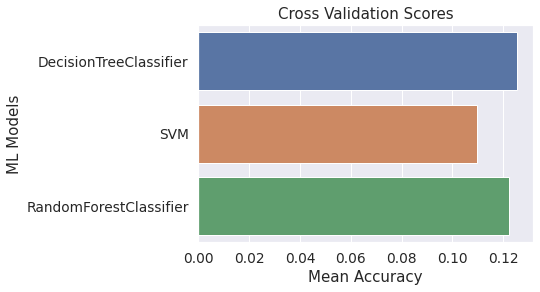

In [129]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [130]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.12598425196850394


In [131]:
test_saleprice = pd.Series(votingC.predict(test), name = "SalePrice").astype(float)
results = pd.concat([test_Id, test_saleprice],axis = 1)
results.to_csv("sale1.csv", index = False)


<a id="14"></a><br>
### Feature Engineering for train_test

In [132]:
# testval and train_test_0 == train_df 

In [133]:
#visualize fonk
def bhst(variable):
    fig = px.histogram(train_test,x=variable,marginal='box',title=variable, width=700, height=500,color_discrete_sequence=['indianred'])
    fig.update_layout(bargap=0.1)
    fig.show()
    fig = px.histogram(train_test,x = variable, y = "SalePrice",color=variable,histfunc='avg',marginal='box',barmode='overlay',title=variable, width=700, height=500)
    fig.update_layout(bargap=0.1,barmode='stack')
    fig.show()
    fig1 = px.box(train_test, x=variable, y="SalePrice",color=variable,width=700,height=500,)
    fig1.update_traces(quartilemethod="exclusive")
    fig1.show()
    fig = px.scatter(train_test,x=variable,y="SalePrice",title=variable,width=700,height=500,marginal_x="histogram", marginal_y="rug",trendline="ols",color=variable)
    fig.show()

In [134]:
train_test=train_test_0[["SalePrice","OverallQual", "GrLivArea", "GarageCars", "TotalSF", "MSZoning", 
                    "ExterQual", "BsmtQual", "CentralAir", "KitchenQual","MSSubClass","LotShape",
                    "Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd",
                    "MasVnrType","Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType",
                    "BedroomAbvGr","Fireplaces"]].copy()


train_test.head()

SalePrice  OverallQual  GrLivArea  GarageCars  TotalSF MSZoning ExterQual  \
0   208500.0            7       1710         2.0   2566.0       RL        Gd   
1   181500.0            6       1262         2.0   2524.0       RL        TA   
2   223500.0            7       1786         2.0   2706.0       RL        Gd   
3   140000.0            7       1717         3.0   2473.0       RL        TA   
4   250000.0            8       2198         3.0   3343.0       RL        Gd   

  BsmtQual CentralAir KitchenQual  ...  Exterior1st Exterior2nd MasVnrType  \
0       Gd          Y          Gd  ...      VinylSd     VinylSd    BrkFace   
1       Gd          Y          TA  ...      MetalSd     MetalSd          0   
2       Gd          Y          Gd  ...      VinylSd     VinylSd    BrkFace   
3       TA          Y          Gd  ...      Wd Sdng     Wd Shng          0   
4       Gd          Y          Gd  ...      VinylSd     VinylSd    BrkFace   

  Foundation BsmtExposure BsmtFinType1 HeatingQC SaleType BedroomAbvGr  \
0      PConc           No          GLQ        Ex       WD            3   
1     CBlock           Gd          ALQ        Ex       WD            3   
2      PConc           Mn          GLQ        Ex       WD            3   
3     BrkTil           No          ALQ        Gd       WD            3   
4      PConc           Av          GLQ        Ex       WD            4   

  Fireplaces  
0          0  
1          1  
2          1  
3          1  
4          1  

[5 rows x 26 columns]

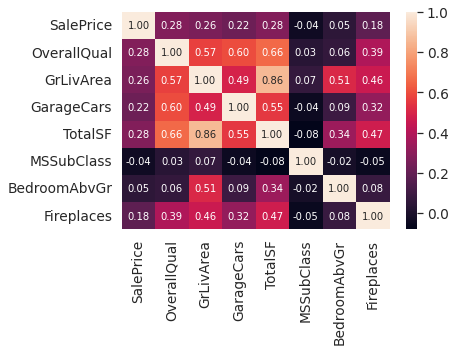

In [135]:
modeling_values=["SalePrice","OverallQual", "GrLivArea", "GarageCars", "TotalSF",  "MSZoning",   "ExterQual", "BsmtQual", "CentralAir", "KitchenQual"
                ,"MSSubClass","LotShape","Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd","MasVnrType",
                 "Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","BedroomAbvGr","Fireplaces"]

sns.heatmap(train_test_0[modeling_values].corr(), annot = True,annot_kws={'size': 10}, fmt = ".2f")
plt.show()

In [136]:
train_test["OverallQual"] = train_test["OverallQual"].replace([1],2)

In [137]:
train_test[(train_test["OverallQual"]==10) & (train_test["SalePrice"]<379000)] 

SalePrice  OverallQual  GrLivArea  GarageCars  TotalSF MSZoning  \
521    184750.0           10       4676         3.0   7814.0       RL   
581    325000.0           10       2775         2.0   4012.0       RM   
987    337500.0           10       1718         3.0   3418.0       RL   
1288   160000.0           10       5642         2.0  11752.0       RL   
1431   310000.0           10       2007         3.0   3024.0       FV   
1652        0.0           10       2674         3.0   5304.0       RL   
1666        0.0           10       2492         3.0   4984.0       RL   
1959        0.0           10       2790         4.0   4410.0       RL   
1963        0.0           10       2470         3.0   5005.0       RL   
2026        0.0           10       2393         2.0   3363.0       FV   
2256        0.0           10       2042         3.0   3784.0       RL   
2280        0.0           10       2046         3.0   4040.0       RL   
2283        0.0           10       2290         3.0   4610.0       RL   
2328        0.0           10       1966         3.0   3932.0       RL   
2538        0.0           10       5095         3.0  10190.0       RL   
2587        0.0           10       1824         3.0   3648.0       RL   
2617        0.0           10       3390         3.0   4918.0       RL   
2619        0.0           10       2698         3.0   4548.0       RL   

     ExterQual BsmtQual CentralAir KitchenQual  ...  Exterior1st Exterior2nd  \
521         Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
581         Ex       TA          Y          Gd  ...      Wd Sdng     Wd Sdng   
987         Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
1288        Ex       Ex          Y          Ex  ...       Stucco      Stucco   
1431        Ex       Ex          Y          Ex  ...      VinylSd     VinylSd   
1652        Ex       Ex          Y          Ex  ...      VinylSd     VinylSd   
1666        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
1959        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
1963        Ex       Ex          Y          Ex  ...      MetalSd     MetalSd   
2026        Ex       Gd          Y          Ex  ...      BrkFace     MetalSd   
2256        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
2280        Ex       Ex          Y          Ex  ...      VinylSd     VinylSd   
2283        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
2328        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
2538        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
2587        Ex       Ex          Y          Ex  ...      MetalSd     MetalSd   
2617        Ex       Ex          Y          Ex  ...      CemntBd     CmentBd   
2619        Ex       Ex          Y          Ex  ...      VinylSd     VinylSd   

     MasVnrType Foundation BsmtExposure BsmtFinType1 HeatingQC SaleType  \
521       Stone      PConc           Gd          GLQ        Ex      New   
581           0     BrkTil           No          Unf        Gd       WD   
987       Stone      PConc           Gd          GLQ        Ex       WD   
1288      Stone      PConc           Gd          GLQ        Ex      New   
1431      Stone      PConc           Av          GLQ        Ex       WD   
1652      Stone      PConc           Gd          GLQ        Ex       WD   
1666      Stone      PConc           Gd          GLQ        Ex       WD   
1959    BrkFace      PConc           Gd          GLQ        Ex       WD   
1963      Stone      PConc           Gd          GLQ        Ex       WD   
2026          0      PConc           Mn          BLQ        Ex       WD   
2256    BrkFace      PConc           Gd          GLQ        Ex      New   
2280    BrkFace      PConc           Gd          GLQ        Ex       WD   
2283    BrkFace      PConc           Av          GLQ        Ex      New   
2328    BrkFace      PConc           Av        

In [138]:
change_value=[521, 581, 987, 1288, 1431]
for i in change_value:
    train_test["OverallQual"][i]=9

In [139]:
train_test["MSZoning"].value_counts()

RL         2258
RM          461
FV          139
C (all)      25
RH           25
Name: MSZoning, dtype: int64

In [140]:
train_test["MSZoning"]=train_test["MSZoning"].replace(["RH"],"C (all)")

In [141]:
dumi=["OverallQual","GarageCars",   "MSZoning",
      "ExterQual", "BsmtQual", "CentralAir", "KitchenQual"
     ,"MSSubClass","LotShape","Neighborhood","Condition1","BldgType","HouseStyle","Exterior1st","Exterior2nd","MasVnrType",
      "Foundation","BsmtExposure","BsmtFinType1","HeatingQC","SaleType","BedroomAbvGr","Fireplaces"]
# for i in dumi:
#     print("------",i,"---------------")
#     print(train_test[i].value_counts())

In [142]:
train_test_save=train_test

In [143]:

for i in dumi:
    train_test = pd.get_dummies(train_test,columns=[i])
train_test.head()

SalePrice  GrLivArea  TotalSF  OverallQual_2  OverallQual_3  OverallQual_4  \
0   208500.0       1710   2566.0              0              0              0   
1   181500.0       1262   2524.0              0              0              0   
2   223500.0       1786   2706.0              0              0              0   
3   140000.0       1717   2473.0              0              0              0   
4   250000.0       2198   3343.0              0              0              0   

   OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  ...  \
0              0              0              1              0  ...   
1              0              1              0              0  ...   
2              0              0              1              0  ...   
3              0              0              1              0  ...   
4              0              0              0              1  ...   

   BedroomAbvGr_2  BedroomAbvGr_3  BedroomAbvGr_4  BedroomAbvGr_5  \
0               0               1               0               0   
1               0               1               0               0   
2               0               1               0               0   
3               0               1               0               0   
4               0               0               1               0   

   BedroomAbvGr_6  Fireplaces_0  Fireplaces_1  Fireplaces_2  Fireplaces_3  \
0               0             1             0             0             0   
1               0             0             1             0             0   
2               0             0             1             0             0   
3               0             0             1             0             0   
4               0             0             1             0             0   

   Fireplaces_4  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 183 columns]

<a id="15"></a><br>
### Modeling for train_test

In [144]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [145]:
test2 = train_test[train_df_len:]
test2.drop(labels = ["SalePrice"],axis = 1, inplace = True)

In [146]:
train2 = train_test[:train_df_len]
X_train2 = train2.drop(labels = "SalePrice", axis = 1)
y_train2 = train2["SalePrice"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.30, random_state = 42)
print("X_train",len(X_train2))
print("X_test",len(X_test2))
print("y_train",len(y_train2))
print("y_test",len(y_test2))
print("test",len(test2))

X_train 1014
X_test 435
y_train 1014
y_test 435
test 1459


In [147]:
logreg = LogisticRegression()
logreg.fit(X_train2, y_train2)
acc_log_train2 = round(logreg.score(X_train2, y_train2)*100,2) 
acc_log_test2 = round(logreg.score(X_test2,y_test2)*100,2)
print("Training Accuracy: % {}".format(acc_log_train2))
print("Testing Accuracy: % {}".format(acc_log_test2))

Training Accuracy: % 1.08
Testing Accuracy: % 0.92


In [148]:
test_saleprice2 = pd.Series(logreg.fit(X_train2, y_train2).predict(test2), name = "SalePrice").astype(float)
results = pd.concat([test_Id, test_saleprice2],axis = 1)
results.to_csv("salelogfinal.csv", index = False)

In [149]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,]

In [150]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train2,y_train2)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.02660648417782955
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.013812851873422636
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.0168025626092021


Text(0.5, 1.0, 'Cross Validation Scores')

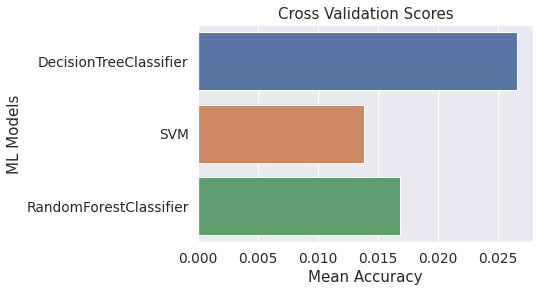

In [151]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

In [152]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train2, y_train2)
print(accuracy_score(votingC.predict(X_test2),y_test2))

0.020689655172413793


In [153]:
test2_saleprice = pd.Series(votingC.predict(test2), name = "SalePrice").astype(float)
results2 = pd.concat([test_Id,test2_saleprice],axis =1 )
results2.to_csv("saledtrfc.csv", index = False)